
> Indented block



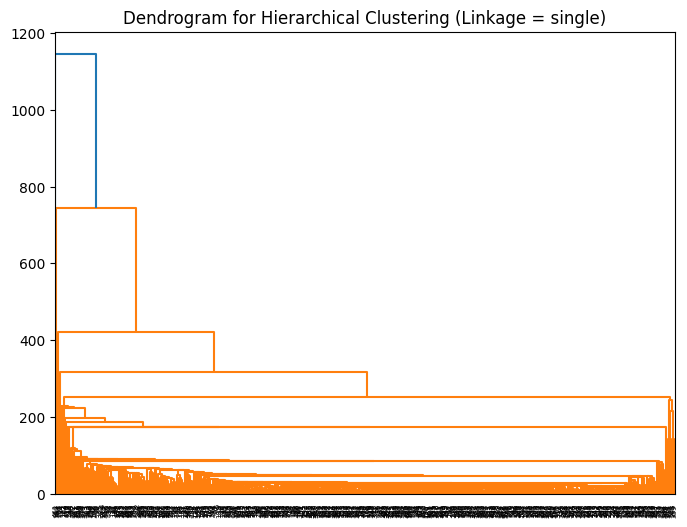

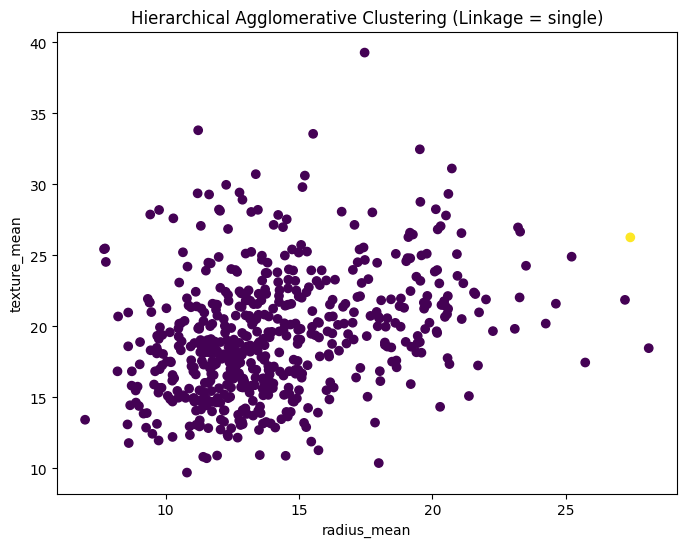

Cluster counts for linkage 'single' in hierarchical agglomerative clustering: {1: 568, 2: 1}


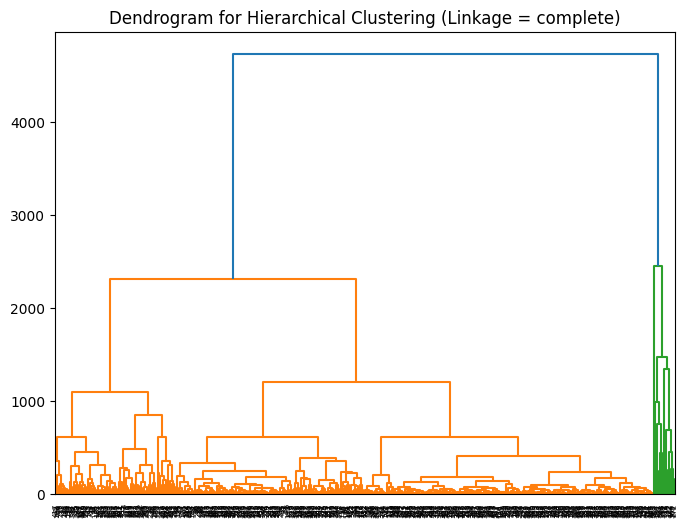

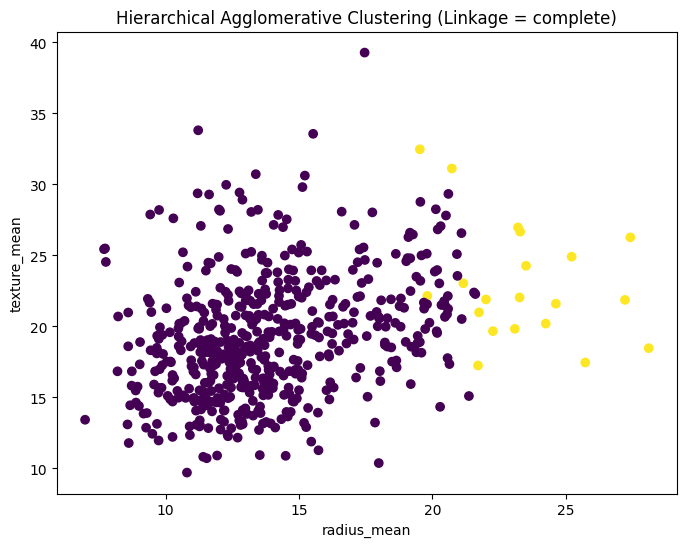

Cluster counts for linkage 'complete' in hierarchical agglomerative clustering: {1: 549, 2: 20}


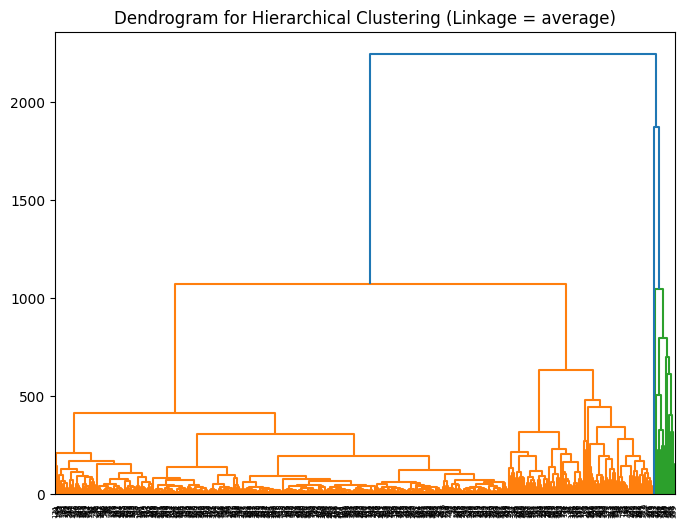

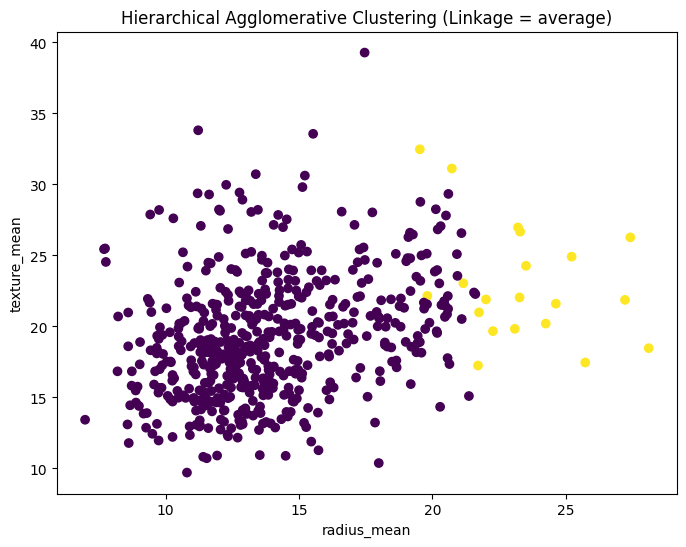

Cluster counts for linkage 'average' in hierarchical agglomerative clustering: {1: 549, 2: 20}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# dataset
data = pd.read_csv('cancer.csv')

# Extract features excluding 'id' and 'diagnosis'
X = data.drop(['id', 'diagnosis'], axis=1)
X.fillna(0, inplace=True)
X.replace([np.inf, -np.inf], 1e9, inplace=True)

# Extract 'radius_mean' and 'texture_mean' for plotting
X_plot = X[['radius_mean', 'texture_mean']]

# Methods for hierarchical agglomerative clustering
linkage_methods = ['single', 'complete', 'average']

cluster_labels_agglomerative = {}
for linkage_method in linkage_methods:
    # Calculate linkage matrix
    Z = linkage(X, method=linkage_method)

    # Plotting dendrogram
    plt.figure(figsize=(8, 6))
    dendrogram(Z)
    plt.title(f"Dendrogram for Hierarchical Clustering (Linkage = {linkage_method})")
    plt.show()

    # Perform clustering and specify the number of clusters (2)
    labels = fcluster(Z, t=2, criterion='maxclust')

    # Store cluster labels
    cluster_labels_agglomerative[linkage_method] = labels

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_plot['radius_mean'], X_plot['texture_mean'], c=labels, cmap='viridis')
    plt.title(f"Hierarchical Agglomerative Clustering (Linkage = {linkage_method})")
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.show()

    # Count the number of points belonging to each cluster
    unique_labels, counts = np.unique(labels, return_counts=True)
    cluster_counts = dict(zip(unique_labels, counts))
    print(f"Cluster counts for linkage '{linkage_method}' in hierarchical agglomerative clustering: {cluster_counts}")


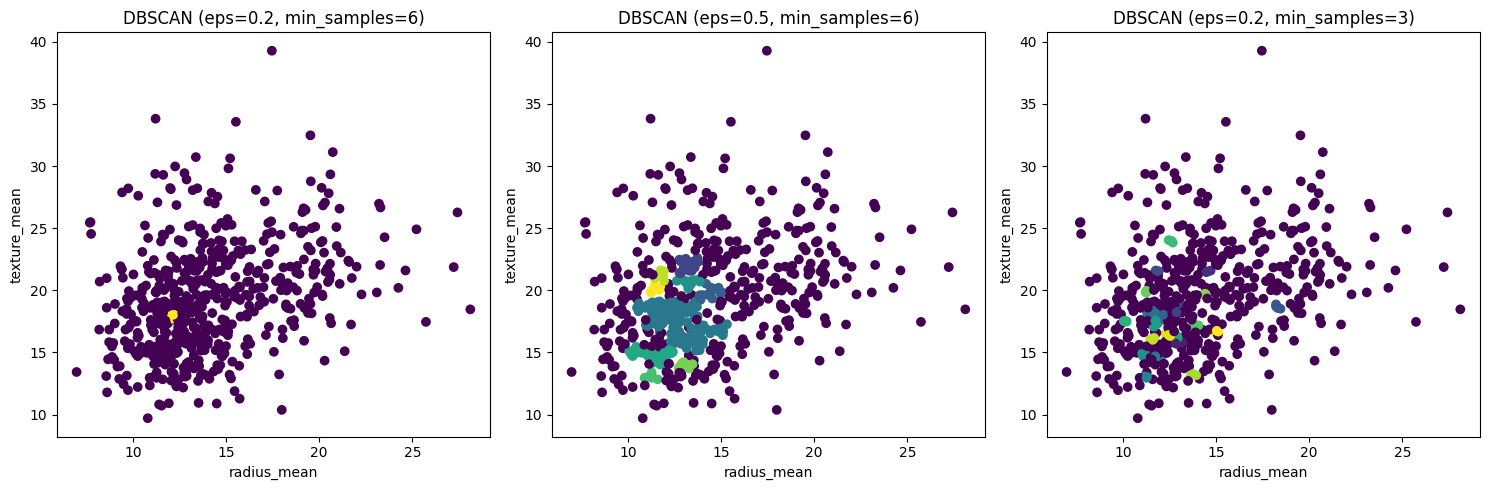

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cancer.csv')

# Extract the relevant columns for clustering
X = data[['radius_mean', 'texture_mean']].values

# DBSCAN algorithm
def dbscan(X, eps, min_samples):
    labels = np.zeros(X.shape[0], dtype=int)
    cluster_id = 0

    for i in range(X.shape[0]):
        if labels[i] != 0:
            continue

        neighbors = find_neighbors(X, i, eps)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

def find_neighbors(X, point_idx, eps):
    neighbors = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[point_idx] - X[i]) < eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, neighbors, cluster_id, eps, min_samples):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] == -1:
            labels[neighbor_idx] = cluster_id
        elif labels[neighbor_idx] == 0:
            labels[neighbor_idx] = cluster_id
            neighbor_neighbors = find_neighbors(X, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors += neighbor_neighbors
        i += 1

# Initialize DBSCAN with the specified parameters
eps_minpoints = [(0.2, 6), (0.5, 6), (0.2, 3)]

# Plot clusters for different parameters
plt.figure(figsize=(15, 5))
for i, (eps, min_samples) in enumerate(eps_minpoints):
    labels = dbscan(X, eps, min_samples)

    # Create a scatter plot of the clusters
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')

plt.tight_layout()
plt.show()
